<center><img src="Fig/UGA.png" width="30%" height="30%"></center>
<center><h3>Master of Science in Industrial and Applied Mathematics (MSIAM)  - 1st year</h3></center>
<hr>
<center><h1>Numerical Optimization</h1></center>
<center><h2>Lab on Variance-Reduced Stochastic Gradient</h2></center>

---

The following script will allow you to import *notebooks* as if you imported *python files* and will have to be executed at each time you launch Jupyter notebooks.

In [7]:
import start
from imp import reload

---

# Recall of the proximal gradient algorithm



In [8]:
import algoProx             # load our algoProx module (from notebook)
reload(algoProx)            # reload the module if changed (and saved)
from algoProx import *      # import all methods of the module into the current environment

import numpy as np
import logistic_regression_student as pb
reload(pb)

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 1e-5                     # Sought precision
ITE_MAX = 1000                      # Max number of iterations
x0      = np.zeros(pb.n)              # Initial point
step    = 1.0/pb.L

##### gradient algorithm
x,x_tab = proximal_gradient_algorithm(pb.F , pb.f_grad , pb.g_prox , x0 , step , PREC, ITE_MAX , True)



importing notebook from algoProx.ipynb
importing notebook from logistic_regression_student.ipynb
------------------------------------
 Proximal gradient algorithm
------------------------------------
START    -- stepsize = 0.030334772813507393
FINISHED -- 898 iterations / 1.555635s -- final value: 0.438713




## Decrease of the algorithm.

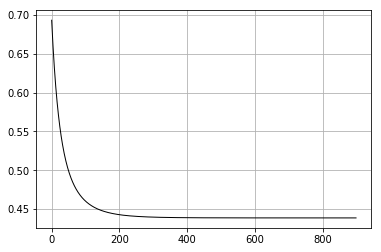

In [9]:
import matplotlib.pyplot as plt
% matplotlib inline

F = []
for i in range(x_tab.shape[0]):
    F.append( pb.F(x_tab[i])) 

plt.figure()
plt.plot( F, color="black", linewidth=1.0, linestyle="-")
plt.grid(True)
plt.show()

### Support of the vector $x_k$ 


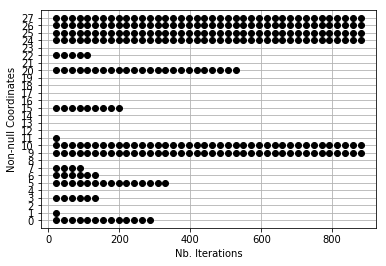

In [10]:
plt.figure()

for i in np.arange(0,x_tab.shape[0],int(x_tab.shape[0]/40)):
    for j in range(pb.n):
        if np.abs(x_tab[i,j])>1e-14:
            plt.plot( i , j  , 'ko')

plt.grid(True)
plt.ylabel('Non-null Coordinates')
plt.xlabel('Nb. Iterations')
plt.ylim(-1,pb.d+1)
plt.yticks(np.arange(0,pb.d+1))
plt.show()

---

# Stochastic gradient 


In the following, instead of considering $f$ as a whole, we will use its structure 
$$ f(x) := \frac{1}{m}\sum_{i=1}^m f_i(x)$$

> Implement the gradient related to $f_i$, related to one example, in ``[logistic_regression_student]``

With this structure a popular minimization algorithm is the *stochastic gradient algorithm* which writes as follows:
* Select uniformly $i$ in $1,..,m$
* $x_{k+1} = \mathbf{prox}_{\gamma g}\left( x_k - \gamma_k \nabla f_i(x_k) \right) $

> Implement this algorithm with a stepsize vanishing as $1/k$

In [11]:
### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.001                     # Sought precision
ITE_MAX = 1000                      # Max number of iterations
x0      = np.zeros(pb.n)              # Initial point
step    = 1.0/pb.L

##### stochastic gradient algorithm
x,x_tab = stochastic_gradient_descent(pb.F , pb.f_grad , pb.f_grad_i , pb.g_prox , x0 , pb.m, step , PREC , ITE_MAX ,  True)

AttributeError: module 'logistic_regression_student' has no attribute 'f_grad_i'

## Decrease of the algorithm.

In [ ]:
F = []
for i in range(x_tab.shape[0]):
    F.append( pb.F(x_tab[i])) 

plt.figure()
plt.plot( F, color="black", linewidth=1.0, linestyle="-")
plt.grid(True)
plt.show()

### Support of the vector $x_k$ 


In [ ]:
plt.figure()

for i in np.arange(0,x_tab.shape[0],int(x_tab.shape[0]/40)):
    for j in range(pb.n):
        if np.abs(x_tab[i,j])>1e-14:
            plt.plot( i , j  , 'ko')

plt.grid(True)
plt.ylabel('Non-null Coordinates')
plt.xlabel('Nb. Iterations')
plt.ylim(-1,pb.d+1)
plt.yticks(np.arange(0,pb.d+1))
plt.show()

### Variance reduction

The poor performance of this algorithm is notably due to the variance of the gradients. In order to overcome it, *variance reduced* algorithms have been proposed.

We will consider here the popular **SAGA** algorithm  (SAGA: A fast incremental gradient method with support for non-strongly convex composite objectives
A Defazio, F Bach, S Lacoste-Julien, NIPS 2014. ) 

> Implement SAGA from the paper ( http://papers.nips.cc/paper/5258-saga-a-fast-incremental-gradient-method-with-support-for-non-strongly-convex-composite-objectives ) and compare with the stochastic gradient algorithm.


In [ ]:
#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.00001                     # Sought precision
ITE_MAX = 1000                      # Max number of iterations
x0      = np.zeros(pb.n)              # Initial point
step    = 1.0/pb.L

##### stochastic gradient algorithm
x,x_tab = saga(pb.F , pb.f_grad , pb.f_grad_i , pb.g_prox , x0 , pb.m, step , PREC , ITE_MAX ,  True)

## Decrease of the algorithm.

In [ ]:
F = []
for i in range(x_tab.shape[0]):
    F.append( pb.F(x_tab[i])) 

plt.figure()
plt.plot( F, color="black", linewidth=1.0, linestyle="-")
plt.grid(True)
plt.show()

### Support of the vector $x_k$ 


In [ ]:
plt.figure()

for i in np.arange(0,x_tab.shape[0],int(x_tab.shape[0]/40)):
    for j in range(pb.n):
        if np.abs(x_tab[i,j])>1e-14:
            plt.plot( i , j  , 'ko')

plt.grid(True)
plt.ylabel('Non-null Coordinates')
plt.xlabel('Nb. Iterations')
plt.ylim(-1,pb.d+1)
plt.yticks(np.arange(0,pb.d+1))
plt.show()